In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir data
!mkdir data/train && mkdir data/test
!cd data/test && wget "https://github.com/p-omahony/handwritten-recognition/raw/main/data/test/emnist-letters-test.csv"
!cd data/train && wget "https://github.com/p-omahony/handwritten-recognition/raw/main/data/train/emnist-letters-train.csv"

--2020-12-11 18:54:45--  https://github.com/p-omahony/handwritten-recognition/raw/main/data/test/emnist-letters-test.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/p-omahony/handwritten-recognition/main/data/test/emnist-letters-test.csv [following]
--2020-12-11 18:54:46--  https://media.githubusercontent.com/media/p-omahony/handwritten-recognition/main/data/test/emnist-letters-test.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28625756 (27M) [text/plain]
Saving to: ‘emnist-letters-test.csv’

emnist-letters-test 100%[===================>]  27.30M  --.-KB/s    in 0.1s    

20

In [ ]:
!ls

data  drive  sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
testing_letter = pd.read_csv("/content/data/test/emnist-letters-test.csv")
training_letter = pd.read_csv("/content/data/train/emnist-letters-train.csv")

In [ ]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)

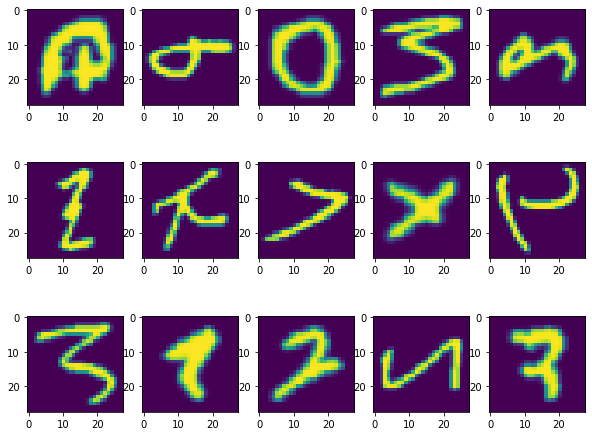

In [ ]:
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [ ]:
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [ ]:
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
MCP = tf.keras.callbacks.ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [ ]:
history = model.fit(train_x,train_y,epochs=20,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/20
2217/2220 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.8281
Epoch 00001: val_accuracy improved from -inf to 0.89144, saving model to Best_points.h5
2220/2220 [==============================] - 9s 4ms/step - loss: 0.5535 - accuracy: 0.8282 - val_loss: 0.3340 - val_accuracy: 0.8914
Epoch 2/20
2216/2220 [============================>.] - ETA: 0s - loss: 0.2818 - accuracy: 0.9092
Epoch 00002: val_accuracy improved from 0.89144 to 0.89527, saving model to Best_points.h5
2220/2220 [==============================] - 9s 4ms/step - loss: 0.2817 - accuracy: 0.9092 - val_loss: 0.3413 - val_accuracy: 0.8953
Epoch 3/20
2208/2220 [============================>.] - ETA: 0s - loss: 0.2234 - accuracy: 0.9263
Epoch 00003: val_accuracy improved from 0.89527 to 0.89938, saving model to Best_points.h5
2220/2220 [==============================] - 9s 4ms/step - loss: 0.2233 - accuracy: 0.9263 - val_loss: 0.3253 - val_accuracy: 0.8994
Epoch 4/20
2214/2220 [===============

In [ ]:
prediction = model.predict(test_x)[2]
prediction

array([1.26867474e-23, 5.17029043e-17, 2.69878493e-13, 6.43626327e-20,
       1.14360520e-13, 1.74137152e-15, 2.27823011e-16, 1.31053057e-12,
       4.74152488e-12, 2.41493066e-08, 3.27958519e-14, 9.64289648e-10,
       2.19888641e-08, 7.88933901e-19, 4.26380493e-11, 4.37853893e-24,
       6.63886372e-16, 1.98929978e-12, 4.27612541e-08, 7.23685561e-17,
       2.12451543e-13, 2.76601143e-13, 2.78007997e-06, 3.18448406e-14,
       9.99920726e-01, 7.63665157e-05, 2.49535982e-12, 2.34336938e-23,
       2.61162579e-23, 3.70270451e-23, 4.13089971e-24, 1.74420996e-23,
       4.70265032e-24, 5.45794117e-23, 2.68523109e-23, 1.27340696e-23,
       3.44273809e-24], dtype=float32)